In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df=pd.read_csv('zameen-updated.csv')

In [42]:
df.shape

(168446, 20)

In [43]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [44]:
df.head(3)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2/4/2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,5/4/2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,7/17/2019,NaN,NaN,Marla,8.0,5-10 Marla


In [45]:
df['price'].describe()

count    1.684460e+05
mean     1.776576e+07
std      3.531003e+07
min      0.000000e+00
25%      1.750000e+05
50%      8.500000e+06
75%      1.950000e+07
max      2.000000e+09
Name: price, dtype: float64

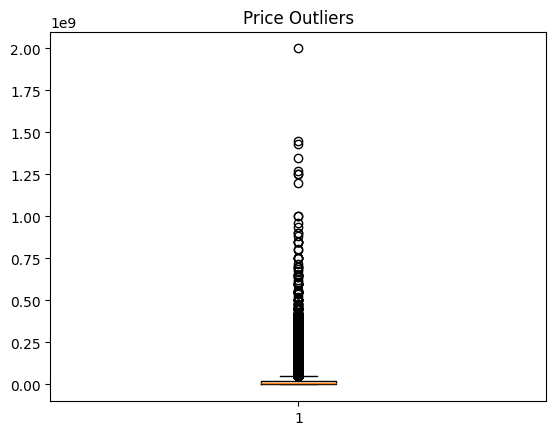

In [46]:
plt.boxplot(df['price'])
plt.title("Price Outliers")
plt.show()

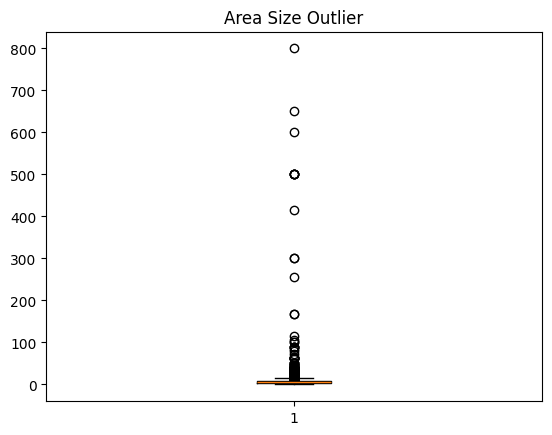

In [47]:
plt.boxplot(df['Area Size'])
plt.title("Area Size Outlier")
plt.show()

In [48]:
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1



In [49]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [50]:
df['price']=df['price'].clip(lower=lower_limit,upper=upper_limit)

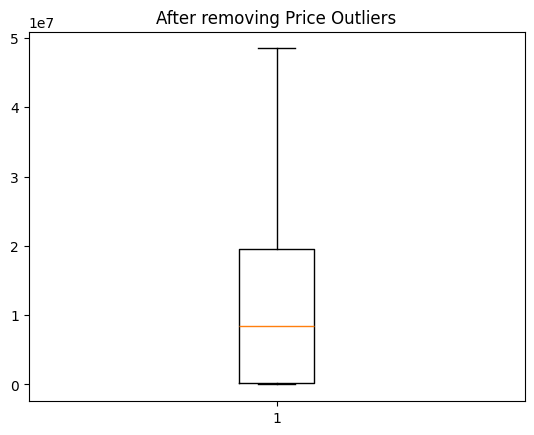

In [51]:
plt.boxplot(df['price'])
plt.title('After removing Price Outliers')
plt.show()

In [52]:
Q1=df['Area Size'].quantile(0.25)
Q3=df['Area Size'].quantile(0.75)
IRQ=Q3-Q1

In [53]:
lower_limit=Q1-0.15*IRQ
upper_limit=Q3+0.15*IRQ

In [54]:
df['Area Size']=df['Area Size'].clip(lower=lower_limit,upper=upper_limit)


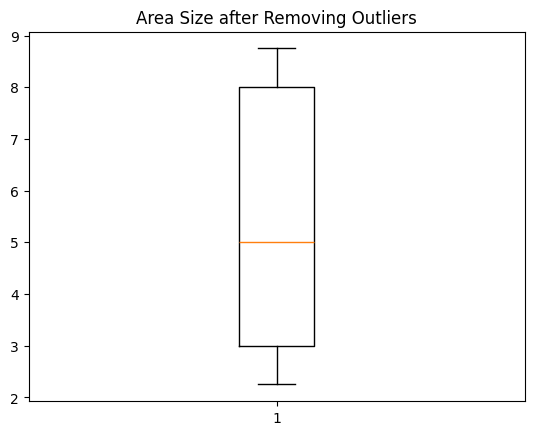

In [55]:
plt.boxplot(df['Area Size'])
plt.title("Area Size after Removing Outliers")
plt.show()

In [56]:
df.duplicated().sum()

np.int64(0)

In [57]:
df.isna().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [58]:
df['agent'].describe()

count        124374
unique        10598
top       Boez Ayub
freq            787
Name: agent, dtype: object

I check there were no duplicates and only two columns agency and agent had unknown/unavailable values so instead of dropping these values which were approx. 44K for each,we filled the values with unknown so as to retain meaningful data

In [59]:
df['agent'].fillna(value='Unknow',inplace=True)
df['agency'].fillna(value='Unknown',inplace=True)

C:\Users\CSC\AppData\Local\Temp\ipykernel_1276\1647994725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agent'].fillna(value='Unknow',inplace=True)
C:\Users\CSC\AppData\Local\Temp\ipykernel_1276\1647994725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [60]:
df['Area Size'].unique()

array([4.  , 5.6 , 8.  , 2.25, 6.2 , 7.1 , 7.8 , 4.5 , 8.75, 3.1 , 5.  ,
       6.  , 8.4 , 4.7 , 4.3 , 6.7 , 5.3 , 2.5 , 2.4 , 7.5 , 3.  , 6.5 ,
       7.  , 3.8 , 5.5 , 4.4 , 3.2 , 4.8 , 7.6 , 5.4 , 5.2 , 6.1 , 3.7 ,
       4.2 , 5.8 , 8.2 , 6.9 , 6.6 , 2.9 , 3.6 , 4.1 , 5.1 , 3.4 , 3.3 ,
       4.9 , 2.3 , 7.3 , 8.1 , 2.8 , 6.4 , 5.7 , 2.7 , 3.9 , 3.5 , 5.9 ,
       8.7 , 6.3 , 8.6 , 2.6 , 6.8 , 8.3 , 7.9 , 4.6 , 7.2 , 8.5 , 7.4 ,
       7.7 ])

In [61]:
df['Area Type'].unique()

array(['Marla', 'Kanal'], dtype=object)

In [62]:
df['Area Type']=df['Area Type'].str.strip().str.lower()

In [63]:
df[['Area Type','Area Size','Area Category']].sample(10)

,Area Type,Area Size,Area Category
46401,marla,8.75,10-15 Marla
48821,marla,4.00,0-5 Marla
37657,marla,2.25,0-5 Marla
161149,kanal,2.25,1-5 Kanal
31259,marla,3.50,0-5 Marla
61362,marla,6.70,5-10 Marla
128704,marla,5.00,0-5 Marla
111662,marla,7.30,5-10 Marla
158944,marla,2.25,0-5 Marla
88591,marla,8.75,10-15 Marla


In [64]:
df.groupby('Area Category')['Area Size'].min()

Area Category
0-5 Marla        2.25
1-5 Kanal        2.25
10-15 Kanal      8.75
10-15 Marla      8.75
100-200 Kanal    8.75
15-20 Kanal      8.75
15-20 Marla      8.75
20-30 Kanal      8.75
200-300 Kanal    8.75
30-40 Kanal      8.75
40-50 Kanal      8.75
400-500 Kanal    8.75
5-10 Kanal       5.10
5-10 Marla       5.10
50-60 Kanal      8.75
500-600 Kanal    8.75
60-70 Kanal      8.75
600-700 Kanal    8.75
70-80 Kanal      8.75
700-800 Kanal    8.75
80-90 Kanal      8.75
90-100 Kanal     8.75
Name: Area Size, dtype: float64

In [65]:
df.groupby('Area Category')['Area Size'].max()

Area Category
0-5 Marla        5.00
1-5 Kanal        5.00
10-15 Kanal      8.75
10-15 Marla      8.75
100-200 Kanal    8.75
15-20 Kanal      8.75
15-20 Marla      8.75
20-30 Kanal      8.75
200-300 Kanal    8.75
30-40 Kanal      8.75
40-50 Kanal      8.75
400-500 Kanal    8.75
5-10 Kanal       8.75
5-10 Marla       8.75
50-60 Kanal      8.75
500-600 Kanal    8.75
60-70 Kanal      8.75
600-700 Kanal    8.75
70-80 Kanal      8.75
700-800 Kanal    8.75
80-90 Kanal      8.75
90-100 Kanal     8.75
Name: Area Size, dtype: float64

The Area Related fields are consistent and the area size is realistic and in fractions too.Also the Area type are relevant and Area Size is in range of the Area Category.

In [66]:
df['price_per_marla']=df['price']/df['Area Size']

In [67]:
df['price_per_bedroom']=df['price']/df['bedrooms']

In [68]:
df.shape

(168446, 22)

In [69]:
df.head(3)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category,price_per_marla,price_per_bedroom
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,...,For Sale,2,2/4/2019,Unknown,Unknow,marla,4.0,0-5 Marla,2.500000e+06,5000000.0
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,...,For Sale,3,5/4/2019,Unknown,Unknow,marla,5.6,5-10 Marla,1.232143e+06,2300000.0
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,...,For Sale,5,7/17/2019,Unknown,Unknow,marla,8.0,5-10 Marla,2.062500e+06,3300000.0


PART B

Scenario 1


Real Estate Investor Decision 

In [70]:
df['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [71]:
df['city'].unique()
major_cities=['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi']
city_df=df[df['city'].isin(major_cities)]


<Figure size 800x500 with 0 Axes>

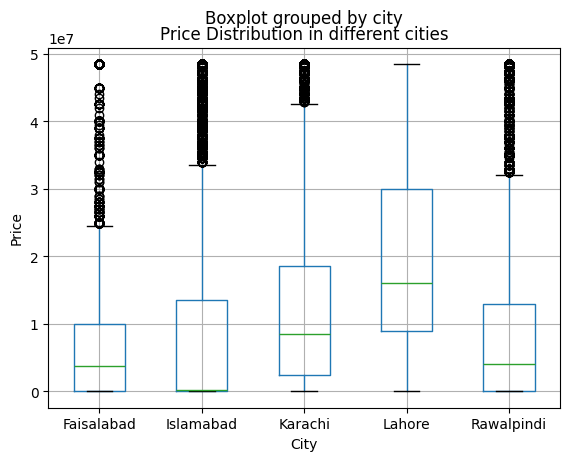

In [72]:
plt.figure(figsize=(8,5))
city_df.boxplot(column='price',by='city')
plt.title('Price Distribution in different cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

In [73]:
price_area = df[df['city'].isin(major_cities)] \
    .groupby(['city', 'property_type'])['price_per_marla'] \
    .mean() \
    .reset_index()


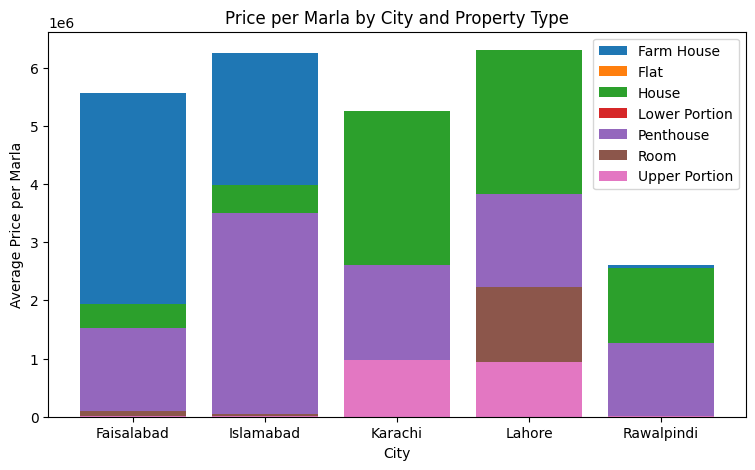

In [74]:
plt.figure(figsize=(9,5))

for ptype in price_area['property_type'].unique():
    subset = price_area[price_area['property_type'] == ptype]
    plt.bar(subset['city'], subset['price_per_marla'], label=ptype)

plt.xlabel('City')
plt.ylabel('Average Price per Marla')
plt.title('Price per Marla by City and Property Type')
plt.legend()
plt.show()


In [77]:
city_volume = df[df['city'].isin(major_cities)] \
    .groupby('city') \
    .size() \
    .reset_index(name='listing_count')


In [75]:
city_price = df[df['city'].isin(major_cities)] \
    .groupby('city')['price_per_marla'] \
    .mean() \
    .reset_index()


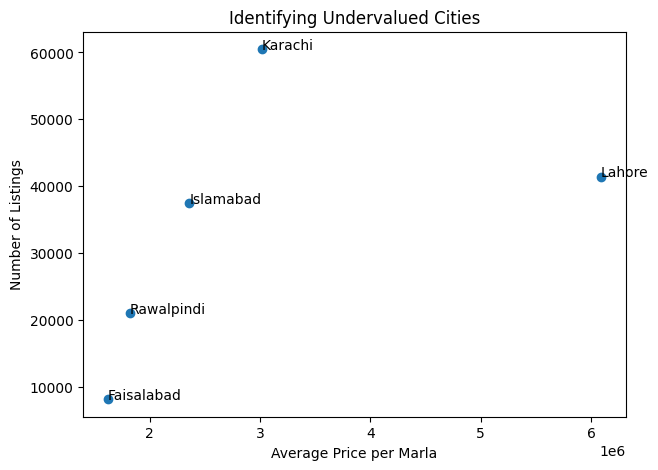

In [78]:
plt.figure(figsize=(7,5))
plt.scatter(city_price['price_per_marla'], city_volume['listing_count'])

for i, city in enumerate(city_price['city']):
    plt.text(city_price['price_per_marla'][i],
             city_volume['listing_count'][i],
             city)

plt.xlabel('Average Price per Marla')
plt.ylabel('Number of Listings')
plt.title('Identifying Undervalued Cities')
plt.show()


Scenario 2: 



Buyer Affordability Analysis



In [81]:
affordability=df['price'].quantile(0.4)
print(affordability)

5500000.0


To define the afforability threshold i extracted 40% of the prices cheaper than the afforability price

In [86]:
affordable_df=df[df['price']<=affordability]
affordable_df[['Area Size','bedrooms','baths']].describe()

,Area Size,bedrooms,baths
count,67470.000000,67470.000000,67470.000000
mean,4.880394,2.421461,2.116111
std,2.446636,1.796166,1.916239
min,2.250000,0.000000,0.000000
25%,2.400000,2.000000,0.000000
50%,4.200000,2.000000,2.000000
75%,7.000000,3.000000,3.000000
max,8.750000,68.000000,14.000000


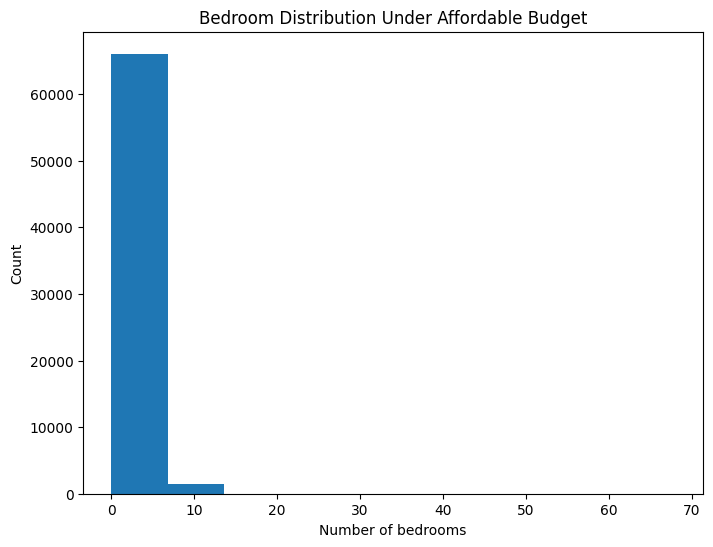

In [93]:
plt.figure(figsize=(8,6))
plt.hist(affordable_df['bedrooms'],bins=10)
plt.xlabel("Number of bedrooms")
plt.ylabel("Count")
plt.title('Bedroom Distribution Under Affordable Budget')
plt.show()

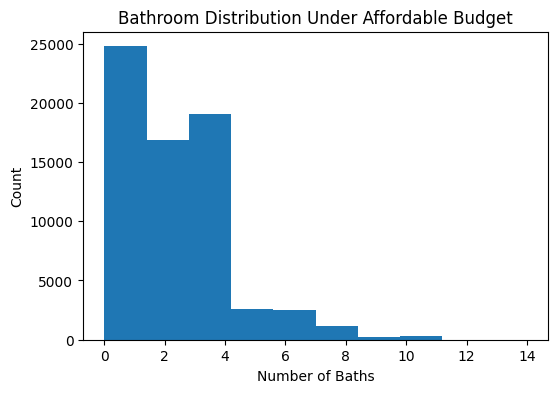

In [94]:
plt.figure(figsize=(6,4))
plt.hist(affordable_df['baths'], bins=10)
plt.xlabel('Number of Baths')
plt.ylabel('Count')
plt.title('Bathroom Distribution Under Affordable Budget')
plt.show()


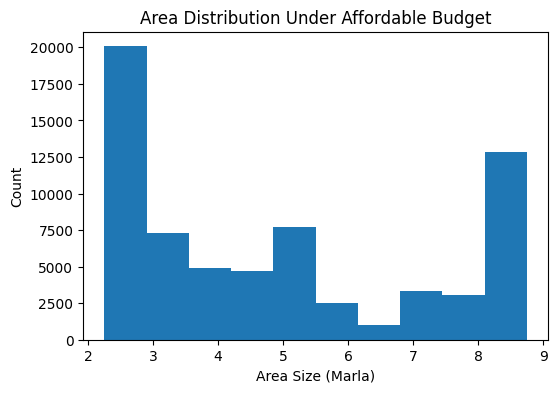

In [95]:
plt.figure(figsize=(6,4))
plt.hist(affordable_df['Area Size'], bins=10)
plt.xlabel('Area Size (Marla)')
plt.ylabel('Count')
plt.title('Area Distribution Under Affordable Budget')
plt.show()
